In [1]:
import warnings
warnings.filterwarnings('ignore')

import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Data Preparation

In [2]:
# load prediction dataset
feature_data = pd.read_csv("prediction_data.csv",parse_dates=["start_time"], low_memory=False)

In [3]:
feature_data.head(2)

,start_time,month,day,hour,mean_duration,max_temp,precip,trips,isWeekday
0,2019-01-01 00:00:00,1.0,1.0,0.0,15.736842,15.6,0.0,19,0
1,2019-01-01 01:00:00,1.0,1.0,1.0,34.625000,15.6,0.0,8,0


## Overview features

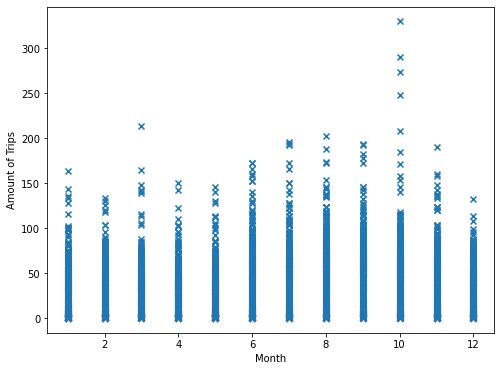

In [4]:
Xp = feature_data["month"].values
Yp = feature_data["trips"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Month")
plt.ylabel("Amount of Trips")
plt.show()

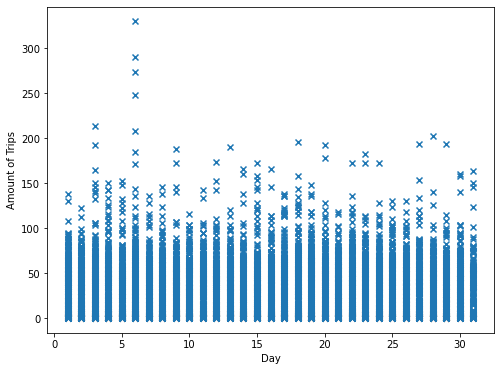

In [5]:
Xp = feature_data["day"].values
Yp = feature_data["trips"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Day")
plt.ylabel("Amount of Trips")
plt.show()

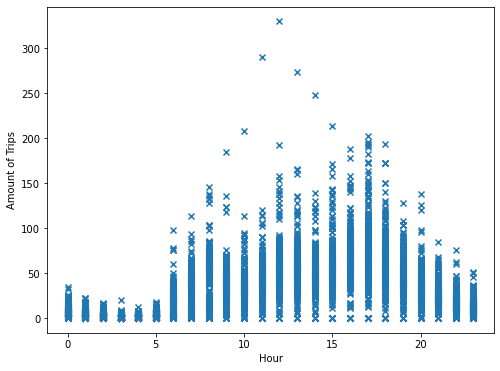

In [6]:
Xp = feature_data["hour"].values
Yp = feature_data["trips"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Hour")
plt.ylabel("Amount of Trips")
plt.show()

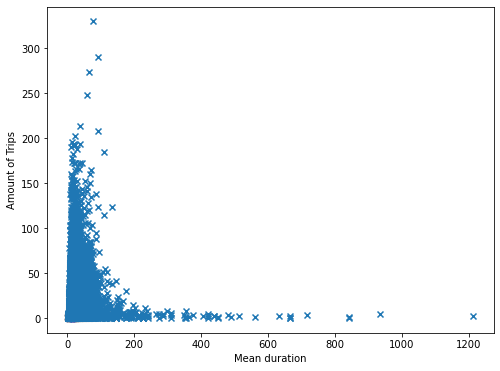

In [7]:
Xp = feature_data["mean_duration"].values
Yp = feature_data["trips"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Mean duration")
plt.ylabel("Amount of Trips")
plt.show()

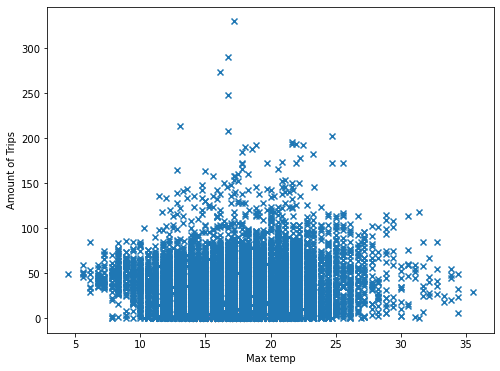

In [8]:
Xp = feature_data["max_temp"].values
Yp = feature_data["trips"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Max temp")
plt.ylabel("Amount of Trips")
plt.show()

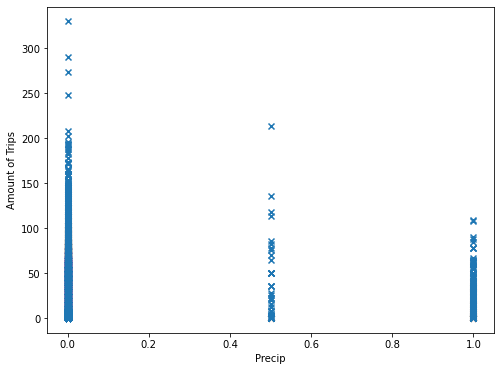

In [9]:
Xp = feature_data["precip"].values
Yp = feature_data["trips"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Precip")
plt.ylabel("Amount of Trips")
plt.show()

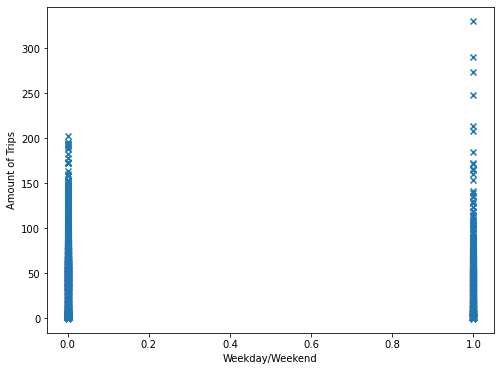

In [10]:
Xp = feature_data["isWeekday"].values
Yp = feature_data["trips"].values
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Weekday/Weekend")
plt.ylabel("Amount of Trips")
plt.show()

## Decision tree for multiple features

In [11]:
X = feature_data.drop(['start_time','trips'],axis=1)
Y = feature_data["trips"]
X.head(2)

,month,day,hour,mean_duration,max_temp,precip,isWeekday
0,1.0,1.0,0.0,15.736842,15.6,0.0,0
1,1.0,1.0,1.0,34.625000,15.6,0.0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [13]:
# Creating decision tree regression model
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
# accuracy of the model
model.score(X_test, y_test) # R^2 (coefficient of determination)

0.3134002557215053

We will now fine tune the decision tree regression model to make it more accurate. Therefore, we play around with the hyperparameters and choose the combinations that improve the model’s score.

In [14]:
# Limiting the max depth of the tree so
model = DecisionTreeRegressor(max_depth=4, random_state = 0)
model.fit(X_train, y_train)
# accuracy of the model
model.score(X_test, y_test) # R^2 (coefficient of determination)

0.5112848138262533

In [15]:
model = DecisionTreeRegressor(max_depth=8, random_state = 0)
model.fit(X_train, y_train)
# accuracy of the model
model.score(X_test, y_test) # R^2 (coefficient of determination)

0.5773612212984527

For a maximal tree depth of 8 we get the highest R^2.

([<matplotlib.axis.YTick at 0x14c164e6850>,
 [Text(0, 0, 'month'),
  Text(0, 1, 'day'),
  Text(0, 2, 'hour'),
  Text(0, 3, 'mean_duration'),
  Text(0, 4, 'max_temp'),
  Text(0, 5, 'precip'),
  Text(0, 6, 'isWeekday')])

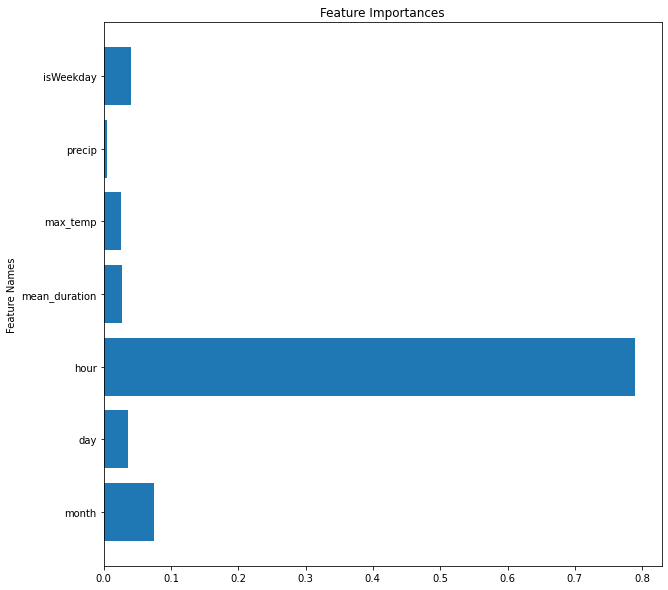

In [16]:
# Vizualization of feature importance
fig, ax = plt.subplots(figsize=(10,10))
plt.barh(range(len(X.columns)), model.feature_importances_)
plt.title("Feature Importances")
plt.ylabel('Feature Names')
plt.yticks(range(7), X.columns)
# plt.savefig("Decision Tree Regression Feature Importance.png")

## Decision Tree for feature "hour"

We can see that "hour" is the feature that impacts "trips" the most. Thus, we will only focus on this feature from now on.

In [17]:
Xp = feature_data["hour"].values 
Yp = feature_data["trips"].values
# don't neeed to normalize data for decision trees

In [18]:
def plot_tree_regression_line(tree_depth):

    # Fit regression model (to full data)
    Tree_reg = DecisionTreeRegressor(max_depth=tree_depth, criterion="mse") 
    Tree_reg.fit(Xp.reshape((-1,1)), Yp)
    Y_pred = Tree_reg.predict(Xp.reshape((-1,1)))
    
    attributes = Tree_reg.tree_

    # plot
    plt.figure(figsize = (10,6))
    plt.scatter(Xp, Yp, marker="x")
    plt.plot(np.arange(Xp.min()-2,Xp.max()+2,1), Tree_reg.predict(np.arange(Xp.min()-2,Xp.max()+2,1).reshape((-1,1))), marker="x", color='C1')
    plt.xlabel("Hour of the day", fontsize=16)
    plt.ylabel("Number of Trips", fontsize=16)
    
    print("number of nodes: ", attributes.node_count)
    print("number of leafs: ", attributes.n_leaves)
    print("R^2: ", r2_score(Yp, Y_pred))
    print("MSE: ", mean_squared_error(Yp, Y_pred))
    print("MAE: ", mean_absolute_error(Yp, Y_pred))
    
    plt.savefig("Tree Regression Line.png")
    #plt.savefig("Peak_Power_Regression_Lines_{}depth.pdf".format(tree_depth))

number of nodes:  45
number of leafs:  23
R^2:  0.5249679725703034
MSE:  430.1682898605117
MAE:  12.865331206605367


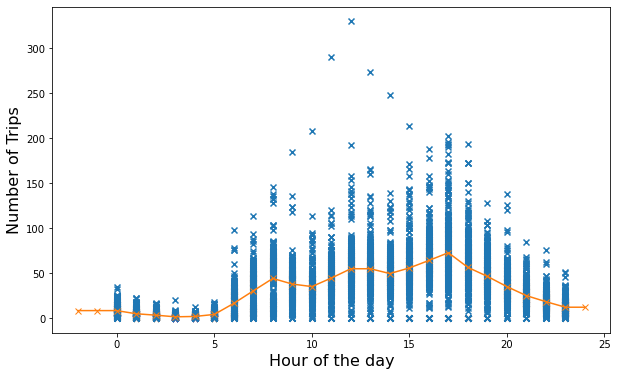

In [19]:
plot_tree_regression_line(7) 
# Mean_duration: with depth of 10-20 the R^2 lies between 0.26-0.52
# Hour: with depth of 4-6 the R^2 lies between 0.5-0.52, after 7 it is not increasing anymore
# Max_temp: with depth of 4-8 the R^2 lies between 0.027-0.043, afterwards it increases very slowly (with a value of 50 its still at 0.048)

In [20]:
def plot_regression_tree_sklearn(tree_depth):

    # Fit regression model (to full data)
    model = DecisionTreeRegressor(max_depth=tree_depth)
    model.fit(Xp.reshape((-1,1)), Yp) 
    
    dot_data = export_graphviz(model,feature_names=["hour"])   
    
    graph = graphviz.Source(dot_data) 
    
    return graph

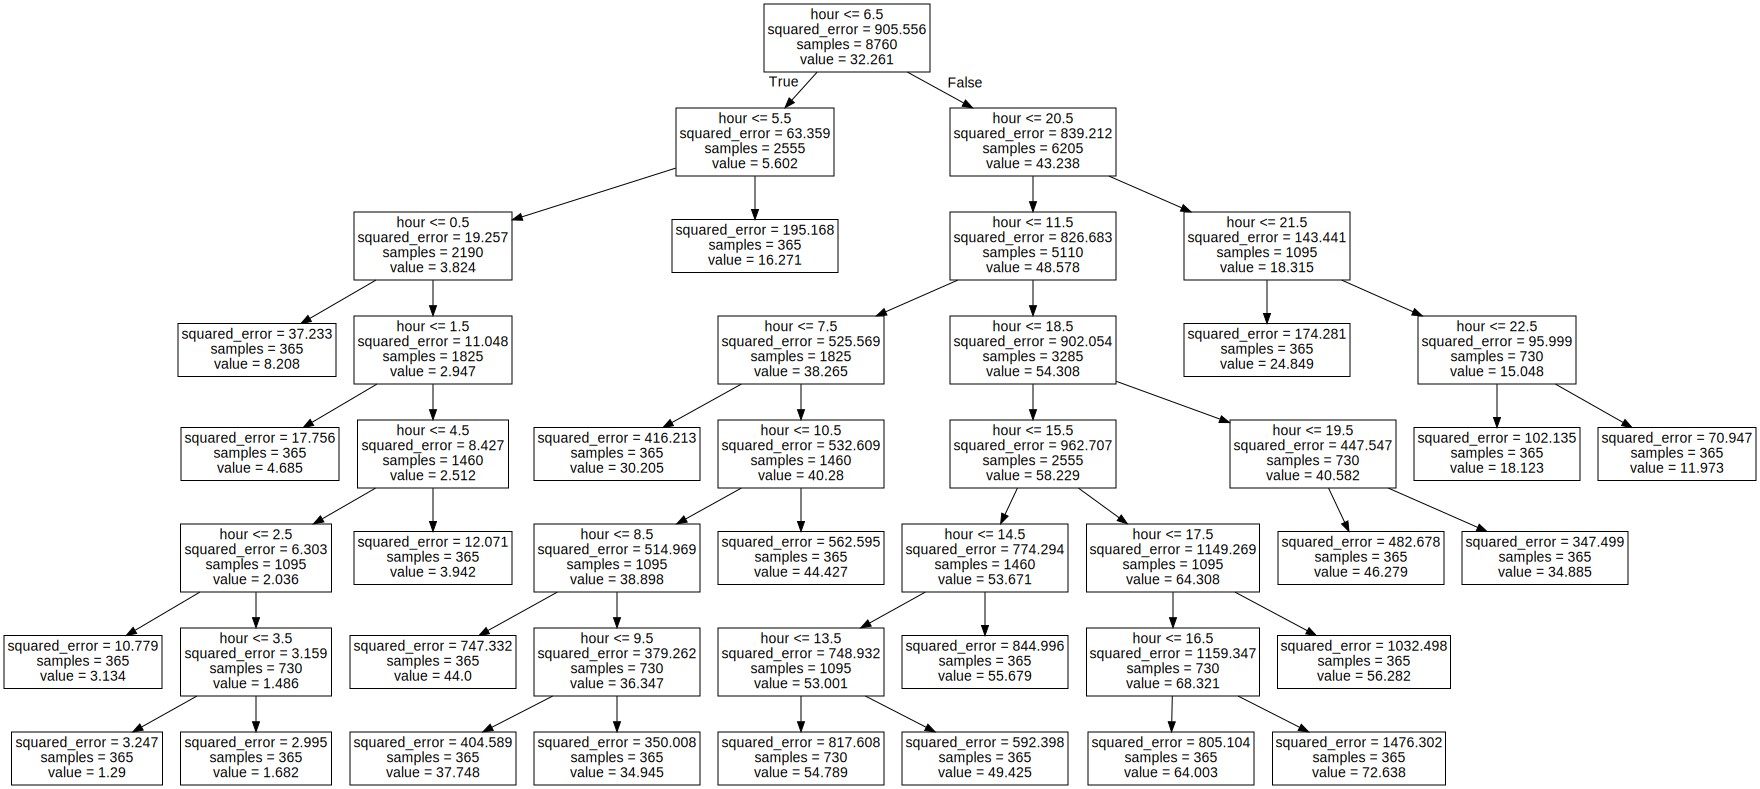

In [21]:
plot_regression_tree_sklearn(7)

## Optimize predictive performance

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(Xp.reshape((-1,1)), Yp, random_state=0)

# fit decision tree (without limit on max_depth, i.e. tree will grow fully if alpha is set to 0)
tree_classifier = DecisionTreeClassifier(random_state=0, criterion="gini")

# compute cost_complexity_pruning_path
path = tree_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
path

{'ccp_alphas': array([0.        , 0.00014007, 0.00014468, 0.00015205, 0.00020692,
        0.00022226, 0.00022491, 0.00023295, 0.00027978, 0.00029369,
        0.00033303, 0.000399  , 0.0005098 , 0.00051136, 0.0005547 ,
        0.00058562, 0.00070819, 0.00127641, 0.00137303, 0.0015662 ,
        0.00216221, 0.00373756, 0.01791397]),
 'impurities': array([0.94404124, 0.94418131, 0.94447067, 0.94462271, 0.94482963,
        0.94505189, 0.9452768 , 0.94550975, 0.94578953, 0.94608322,
        0.94641625, 0.94681525, 0.94732505, 0.94783641, 0.94839111,
        0.94897673, 0.94968492, 0.95096133, 0.95233436, 0.95390056,
        0.95606277, 0.95980033, 0.9777143 ])}

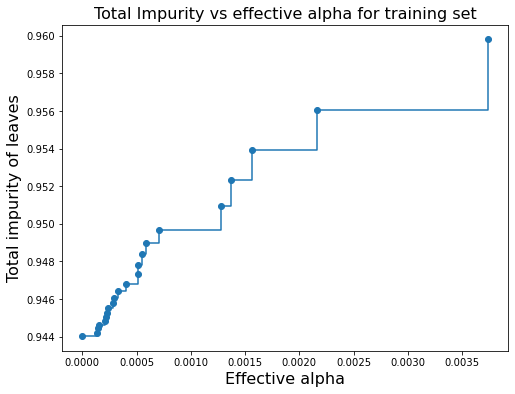

In [24]:
#plot cost_complexity_pruning_path

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")  # we remove the last alpha as this corresponds to a tree with only the root node
ax.set_xlabel("Effective alpha",fontsize=16)
ax.set_ylabel("Total impurity of leaves",fontsize=16)
ax.set_title("Total Impurity vs effective alpha for training set",fontsize=16)

plt.savefig("Determining_Alpha.pdf")

### Train a decision tree using the effective alphas

In [25]:
trees = []
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      trees[1].tree_.node_count, ccp_alphas[1]))

Number of nodes in the last tree is: 45 with ccp_alpha: 0.00014007227316358006


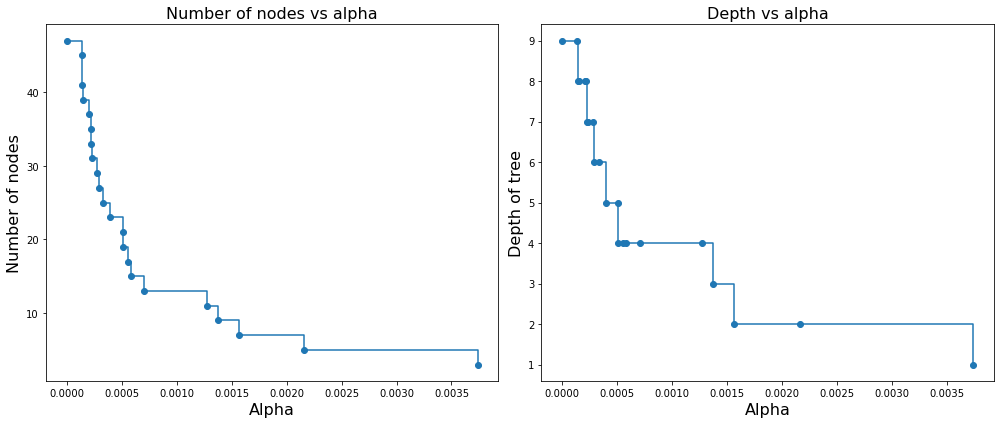

In [26]:
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("Alpha",fontsize=16)
ax[0].set_ylabel("Number of nodes",fontsize=16)
ax[0].set_title("Number of nodes vs alpha",fontsize=16)
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("Alpha",fontsize=16)
ax[1].set_ylabel("Depth of tree",fontsize=16)
ax[1].set_title("Depth vs alpha",fontsize=16)
fig.tight_layout()

#plt.savefig("Pruning_effect.pdf")

In [27]:
len(ccp_alphas)

22

In [28]:
scores_train = []
scores_val = []

# run loop
for ccp_alpha in ccp_alphas:
    
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)    
    
    from sklearn.metrics import accuracy_score
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_val = accuracy_score(y_test, model.predict(X_test))
    scores_val.append(accuracy_val)
    scores_train.append(accuracy_train)
    
# collect results in DF
df = pd.DataFrame(columns=["alpha","train_score","test_score"])
df["alpha"]=ccp_alphas
df["train_score"] = scores_train
df["test_score"] = scores_val

df.sort_values("test_score",ascending=False).head(5)

,alpha,train_score,test_score
20,0.002162,0.100152,0.087215
19,0.001566,0.100152,0.087215
18,0.001373,0.100152,0.087215
21,0.003738,0.099239,0.086301
12,0.000510,0.104110,0.084475


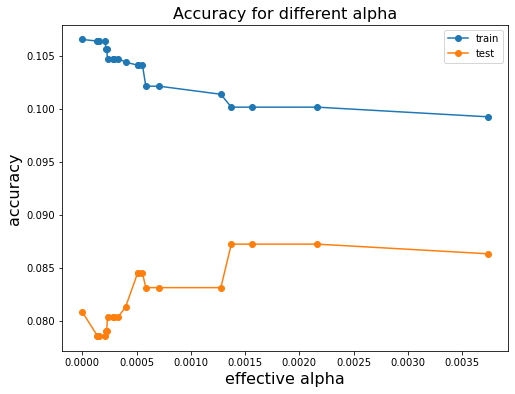

In [29]:
plt.subplots(figsize=(8,6))
plt.plot(df["alpha"],df["train_score"], marker='o')
plt.plot(df["alpha"],df["test_score"], marker='o')
plt.legend(["train","test"])
plt.xlabel("effective alpha",fontsize=16)
plt.ylabel("accuracy",fontsize=16)
plt.title("Accuracy for different alpha",fontsize=16)
#plt.savefig("alpha_tuning.pdf")
plt.show()

number of nodes:  13
number of leafs:  7
R^2:  0.4754493014746548
MSE:  475.0102391005192
MAE:  13.788576551781656


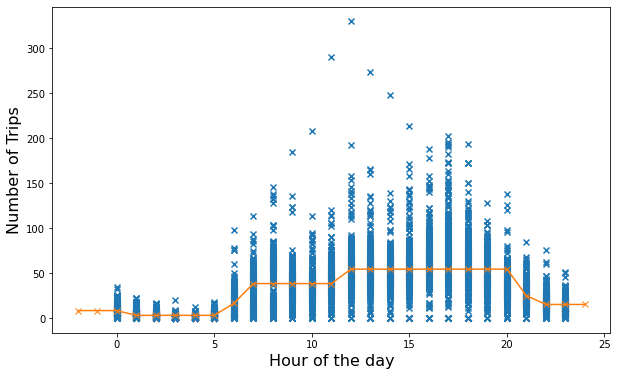

In [30]:
plot_tree_regression_line(3) 

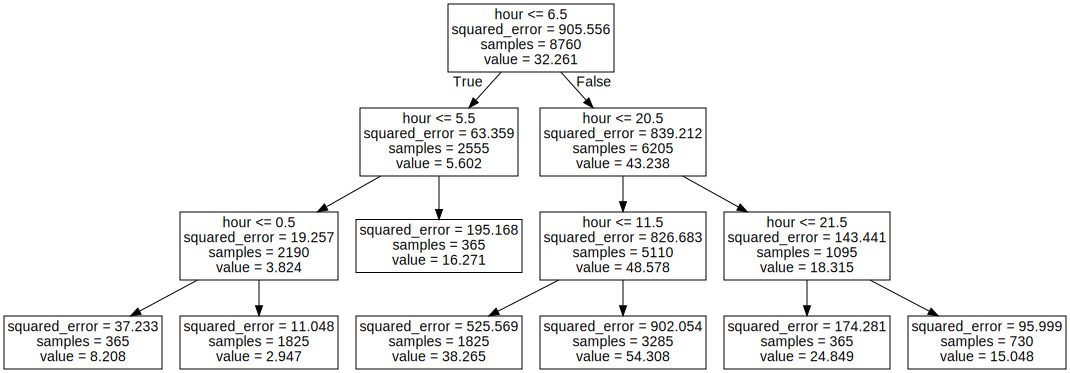

In [31]:
plot_regression_tree_sklearn(3)